In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [218]:
df = pd.read_csv("A:/Masai Projects/ML Project Job ANAlytics/Job_Datacleaned.csv")

In [219]:
df.head()

,Company,Designation,Locations,Established Year,Employees Count,Skills,Link,HR_Name,Experience,Followers
0,EagleView,Senior Financial Accountant (Drive),Work From Home,2008,0 - 10 employees,"Accounting, Auditing, Chartered Accountant, +1...",https://www.instahyre.com/job-248006-senior-fi...,Kavya Iyer,3-6 Years,30000
1,LTIMindtree,Fullstack Developer,"Bangalore, Delhi, Mumbai",1996,More than 1000 employees,"Angular, Java, Microservices, Spring Boot",https://www.instahyre.com/job-249199-fullstack...,Akshata,4-6 Years,452194
2,mPokket,Performance Marketing (Drive),"Bangalore, Kolkata",2016,More than 1000 employees,"Content Marketing, Digital Marketing, Facebook...",https://www.instahyre.com/job-248784-performan...,Aikya Chakraborty,4-8 Years,22000
3,Open Financial Technologies,Zonal Head Sales (Drive),"Chennai, Delhi",2017,200 - 500 employees,"Channel Sales, Payment Processing, Revenue Man...",https://www.instahyre.com/job-248018-zonal-hea...,Libin O K,6-10 Years,35000
4,Piramal Capital & Housing Finance,DPM 1 (Drive),Bangalore,2017,10 - 50 employees,Product Management,https://www.instahyre.com/job-248890-dpm-1-at-...,Hr,1-3 Years,138000


In [220]:
df['Designation'] = df['Designation'].str.replace('(Drive)',"")

C:\Users\Mi\AppData\Local\Temp\ipykernel_20720\2176395642.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Designation'] = df['Designation'].str.replace('(Drive)',"")


In [221]:
df['Designation'] = df['Designation'].str.replace('(',"")

C:\Users\Mi\AppData\Local\Temp\ipykernel_20720\2180667026.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Designation'] = df['Designation'].str.replace('(',"")


In [222]:
df['Designation'] = df['Designation'].str.replace(')',"")

C:\Users\Mi\AppData\Local\Temp\ipykernel_20720\1452341869.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Designation'] = df['Designation'].str.replace(')',"")


In [223]:
df['Skills'] = df['Skills'].str.split(",")

In [224]:
def rem(text):
    joined_text = ' '.join(text)
    words = joined_text.split()
    L = []
    for i in words:
        if i.isalpha():
            L.append(i)
    return L


In [225]:
rem(['Accounting', ' Auditing', ' Chartered Accountant', ' +10', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '])

['Accounting', 'Auditing', 'Chartered', 'Accountant']

In [226]:
df['Skills'] = df['Skills'].apply(rem)

In [227]:
# df['Skills'] = df["Skills"].apply(lambda x: " ".join(x))

In [228]:
max_skills = max([len(row) for row in df['Skills']])

In [229]:

for i in range(1, max_skills+1):
    col_name = 'Skills{}'.format(i)
    df[col_name] = ''

    for index, row in df.iterrows():
        if len(row['Skills']) >= i:
            df.at[index, col_name] = row['Skills'][i-1]

In [230]:
df = df.drop('Skills', axis=1)

In [231]:
df.isnull().sum()

Company             0
Designation         0
Locations           0
Established Year    0
Employees Count     0
Link                0
HR_Name             0
Experience          0
Followers           0
Skills1             0
Skills2             0
Skills3             0
Skills4             0
Skills5             0
Skills6             0
Skills7             0
Skills8             0
Skills9             0
Skills10            0
dtype: int64

In [232]:
df = df.drop(['Skills9','Skills10'], axis=1)

In [233]:
df['Locations'] = df['Locations'].str.split(",")

In [234]:
df['Locations'] = df["Locations"].apply(lambda x : x[0])

In [235]:
df

,Company,Designation,Locations,Established Year,Employees Count,Link,HR_Name,Experience,Followers,Skills1,Skills2,Skills3,Skills4,Skills5,Skills6,Skills7,Skills8
0,EagleView,Senior Financial Accountant,Work From Home,2008,0 - 10 employees,https://www.instahyre.com/job-248006-senior-fi...,Kavya Iyer,3-6 Years,30000,Accounting,Auditing,Chartered,Accountant,,,,
1,LTIMindtree,Fullstack Developer,Bangalore,1996,More than 1000 employees,https://www.instahyre.com/job-249199-fullstack...,Akshata,4-6 Years,452194,Angular,Java,Microservices,Spring,Boot,,,
2,mPokket,Performance Marketing,Bangalore,2016,More than 1000 employees,https://www.instahyre.com/job-248784-performan...,Aikya Chakraborty,4-8 Years,22000,Content,Marketing,Digital,Marketing,Facebook,Marketing,,
3,Open Financial Technologies,Zonal Head Sales,Chennai,2017,200 - 500 employees,https://www.instahyre.com/job-248018-zonal-hea...,Libin O K,6-10 Years,35000,Channel,Sales,Payment,Processing,Revenue,Management,,
4,Piramal Capital & Housing Finance,DPM 1,Bangalore,2017,10 - 50 employees,https://www.instahyre.com/job-248890-dpm-1-at-...,Hr,1-3 Years,138000,Product,Management,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420,Zyient,DevOps Engineer,Bangalore,2019,10 - 50 employees,https://www.instahyre.com/job-246160-devops-en...,Mobeena Syed,4-8 Years,349543,Build,Tools,CI,CD,Linux,Ansible,Ant,AWS
2421,Arcesium,Principal Engineer,Bangalore,2015,500 - 1000 employees,https://www.instahyre.com/job-246143-principal...,Anwesha Daspatnaik Sheher,10-14 Years,103933,Linux,AWS,Docker,Kubernetes,OpenStack,,,
2422,Arintra,DevOps Engineer,Bangalore,2020,10 - 50 employees,https://www.instahyre.com/job-246145-devops-en...,Rovena Dsouza,4-8 Years,3854,DevOps,CI,CD,Kubernetes,AWS,Cloud,Computing,
2423,CAW Studios,Software Developer,Bangalore,2017,50 - 200 employees,https://www.instahyre.com/job-246148-software-...,Careers Caw,2-5 Years,4160,CSS,HTML,JavaScript,,,,,


In [236]:
df.to_csv("finalcleandata.csv",index=False)

In [237]:
df.columns

Index(['Company', 'Designation', 'Locations', 'Established Year',
       'Employees Count', 'Link', 'HR_Name', 'Experience', 'Followers',
       'Skills1', 'Skills2', 'Skills3', 'Skills4', 'Skills5', 'Skills6',
       'Skills7', 'Skills8'],
      dtype='object')

In [238]:
df['Employees Count'] = df['Employees Count'].str.replace("employees","")

In [239]:
df['Employees Count'] = df['Employees Count'].str.replace("More than 1000","1000-2000")

In [240]:
df

,Company,Designation,Locations,Established Year,Employees Count,Link,HR_Name,Experience,Followers,Skills1,Skills2,Skills3,Skills4,Skills5,Skills6,Skills7,Skills8
0,EagleView,Senior Financial Accountant,Work From Home,2008,0 - 10,https://www.instahyre.com/job-248006-senior-fi...,Kavya Iyer,3-6 Years,30000,Accounting,Auditing,Chartered,Accountant,,,,
1,LTIMindtree,Fullstack Developer,Bangalore,1996,1000-2000,https://www.instahyre.com/job-249199-fullstack...,Akshata,4-6 Years,452194,Angular,Java,Microservices,Spring,Boot,,,
2,mPokket,Performance Marketing,Bangalore,2016,1000-2000,https://www.instahyre.com/job-248784-performan...,Aikya Chakraborty,4-8 Years,22000,Content,Marketing,Digital,Marketing,Facebook,Marketing,,
3,Open Financial Technologies,Zonal Head Sales,Chennai,2017,200 - 500,https://www.instahyre.com/job-248018-zonal-hea...,Libin O K,6-10 Years,35000,Channel,Sales,Payment,Processing,Revenue,Management,,
4,Piramal Capital & Housing Finance,DPM 1,Bangalore,2017,10 - 50,https://www.instahyre.com/job-248890-dpm-1-at-...,Hr,1-3 Years,138000,Product,Management,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420,Zyient,DevOps Engineer,Bangalore,2019,10 - 50,https://www.instahyre.com/job-246160-devops-en...,Mobeena Syed,4-8 Years,349543,Build,Tools,CI,CD,Linux,Ansible,Ant,AWS
2421,Arcesium,Principal Engineer,Bangalore,2015,500 - 1000,https://www.instahyre.com/job-246143-principal...,Anwesha Daspatnaik Sheher,10-14 Years,103933,Linux,AWS,Docker,Kubernetes,OpenStack,,,
2422,Arintra,DevOps Engineer,Bangalore,2020,10 - 50,https://www.instahyre.com/job-246145-devops-en...,Rovena Dsouza,4-8 Years,3854,DevOps,CI,CD,Kubernetes,AWS,Cloud,Computing,
2423,CAW Studios,Software Developer,Bangalore,2017,50 - 200,https://www.instahyre.com/job-246148-software-...,Careers Caw,2-5 Years,4160,CSS,HTML,JavaScript,,,,,


In [241]:
df['Employees Count'] = df['Employees Count'].apply(lambda x: x.split('-'))

In [242]:
df

,Company,Designation,Locations,Established Year,Employees Count,Link,HR_Name,Experience,Followers,Skills1,Skills2,Skills3,Skills4,Skills5,Skills6,Skills7,Skills8
0,EagleView,Senior Financial Accountant,Work From Home,2008,"[0 , 10 ]",https://www.instahyre.com/job-248006-senior-fi...,Kavya Iyer,3-6 Years,30000,Accounting,Auditing,Chartered,Accountant,,,,
1,LTIMindtree,Fullstack Developer,Bangalore,1996,"[1000, 2000 ]",https://www.instahyre.com/job-249199-fullstack...,Akshata,4-6 Years,452194,Angular,Java,Microservices,Spring,Boot,,,
2,mPokket,Performance Marketing,Bangalore,2016,"[1000, 2000 ]",https://www.instahyre.com/job-248784-performan...,Aikya Chakraborty,4-8 Years,22000,Content,Marketing,Digital,Marketing,Facebook,Marketing,,
3,Open Financial Technologies,Zonal Head Sales,Chennai,2017,"[200 , 500 ]",https://www.instahyre.com/job-248018-zonal-hea...,Libin O K,6-10 Years,35000,Channel,Sales,Payment,Processing,Revenue,Management,,
4,Piramal Capital & Housing Finance,DPM 1,Bangalore,2017,"[10 , 50 ]",https://www.instahyre.com/job-248890-dpm-1-at-...,Hr,1-3 Years,138000,Product,Management,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420,Zyient,DevOps Engineer,Bangalore,2019,"[10 , 50 ]",https://www.instahyre.com/job-246160-devops-en...,Mobeena Syed,4-8 Years,349543,Build,Tools,CI,CD,Linux,Ansible,Ant,AWS
2421,Arcesium,Principal Engineer,Bangalore,2015,"[500 , 1000 ]",https://www.instahyre.com/job-246143-principal...,Anwesha Daspatnaik Sheher,10-14 Years,103933,Linux,AWS,Docker,Kubernetes,OpenStack,,,
2422,Arintra,DevOps Engineer,Bangalore,2020,"[10 , 50 ]",https://www.instahyre.com/job-246145-devops-en...,Rovena Dsouza,4-8 Years,3854,DevOps,CI,CD,Kubernetes,AWS,Cloud,Computing,
2423,CAW Studios,Software Developer,Bangalore,2017,"[50 , 200 ]",https://www.instahyre.com/job-246148-software-...,Careers Caw,2-5 Years,4160,CSS,HTML,JavaScript,,,,,


In [243]:
df['Employees Count'] = df['Employees Count'].apply(lambda x: (int(x[0])+int(x[1]))/2)

In [245]:
df

,Company,Designation,Locations,Established Year,Employees Count,Link,HR_Name,Experience,Followers,Skills1,Skills2,Skills3,Skills4,Skills5,Skills6,Skills7,Skills8
0,EagleView,Senior Financial Accountant,Work From Home,2008,5.0,https://www.instahyre.com/job-248006-senior-fi...,Kavya Iyer,3-6 Years,30000,Accounting,Auditing,Chartered,Accountant,,,,
1,LTIMindtree,Fullstack Developer,Bangalore,1996,1500.0,https://www.instahyre.com/job-249199-fullstack...,Akshata,4-6 Years,452194,Angular,Java,Microservices,Spring,Boot,,,
2,mPokket,Performance Marketing,Bangalore,2016,1500.0,https://www.instahyre.com/job-248784-performan...,Aikya Chakraborty,4-8 Years,22000,Content,Marketing,Digital,Marketing,Facebook,Marketing,,
3,Open Financial Technologies,Zonal Head Sales,Chennai,2017,350.0,https://www.instahyre.com/job-248018-zonal-hea...,Libin O K,6-10 Years,35000,Channel,Sales,Payment,Processing,Revenue,Management,,
4,Piramal Capital & Housing Finance,DPM 1,Bangalore,2017,30.0,https://www.instahyre.com/job-248890-dpm-1-at-...,Hr,1-3 Years,138000,Product,Management,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420,Zyient,DevOps Engineer,Bangalore,2019,30.0,https://www.instahyre.com/job-246160-devops-en...,Mobeena Syed,4-8 Years,349543,Build,Tools,CI,CD,Linux,Ansible,Ant,AWS
2421,Arcesium,Principal Engineer,Bangalore,2015,750.0,https://www.instahyre.com/job-246143-principal...,Anwesha Daspatnaik Sheher,10-14 Years,103933,Linux,AWS,Docker,Kubernetes,OpenStack,,,
2422,Arintra,DevOps Engineer,Bangalore,2020,30.0,https://www.instahyre.com/job-246145-devops-en...,Rovena Dsouza,4-8 Years,3854,DevOps,CI,CD,Kubernetes,AWS,Cloud,Computing,
2423,CAW Studios,Software Developer,Bangalore,2017,125.0,https://www.instahyre.com/job-246148-software-...,Careers Caw,2-5 Years,4160,CSS,HTML,JavaScript,,,,,


In [246]:
from sklearn.preprocessing import StandardScaler

In [247]:
sc = StandardScaler()

In [249]:
df[['Employees Count','Followers']] = sc.fit_transform(df[['Employees Count','Followers']])

In [159]:
# plt.scatter(data['Employee_count1'],data['Followers'])

In [250]:
df

,Company,Designation,Locations,Established Year,Employees Count,Link,HR_Name,Experience,Followers,Skills1,Skills2,Skills3,Skills4,Skills5,Skills6,Skills7,Skills8
0,EagleView,Senior Financial Accountant,Work From Home,2008,-0.933908,https://www.instahyre.com/job-248006-senior-fi...,Kavya Iyer,3-6 Years,-0.153708,Accounting,Auditing,Chartered,Accountant,,,,
1,LTIMindtree,Fullstack Developer,Bangalore,1996,1.411723,https://www.instahyre.com/job-249199-fullstack...,Akshata,4-6 Years,0.027023,Angular,Java,Microservices,Spring,Boot,,,
2,mPokket,Performance Marketing,Bangalore,2016,1.411723,https://www.instahyre.com/job-248784-performan...,Aikya Chakraborty,4-8 Years,-0.157132,Content,Marketing,Digital,Marketing,Facebook,Marketing,,
3,Open Financial Technologies,Zonal Head Sales,Chennai,2017,-0.392608,https://www.instahyre.com/job-248018-zonal-hea...,Libin O K,6-10 Years,-0.151567,Channel,Sales,Payment,Processing,Revenue,Management,,
4,Piramal Capital & Housing Finance,DPM 1,Bangalore,2017,-0.894683,https://www.instahyre.com/job-248890-dpm-1-at-...,Hr,1-3 Years,-0.107476,Product,Management,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420,Zyient,DevOps Engineer,Bangalore,2019,-0.894683,https://www.instahyre.com/job-246160-devops-en...,Mobeena Syed,4-8 Years,-0.016919,Build,Tools,CI,CD,Linux,Ansible,Ant,AWS
2421,Arcesium,Principal Engineer,Bangalore,2015,0.234985,https://www.instahyre.com/job-246143-principal...,Anwesha Daspatnaik Sheher,10-14 Years,-0.122059,Linux,AWS,Docker,Kubernetes,OpenStack,,,
2422,Arintra,DevOps Engineer,Bangalore,2020,-0.894683,https://www.instahyre.com/job-246145-devops-en...,Rovena Dsouza,4-8 Years,-0.164900,DevOps,CI,CD,Kubernetes,AWS,Cloud,Computing,
2423,CAW Studios,Software Developer,Bangalore,2017,-0.745629,https://www.instahyre.com/job-246148-software-...,Careers Caw,2-5 Years,-0.164769,CSS,HTML,JavaScript,,,,,


In [251]:
from sklearn.cluster import KMeans

In [252]:
kmean = KMeans(n_clusters=4)

In [254]:
y_pred = kmean.fit_predict(df[['Employees Count','Followers']])

C:\Users\Mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [255]:
df['Cluster'] = y_pred

In [257]:
df

,Company,Designation,Locations,Established Year,Employees Count,Link,HR_Name,Experience,Followers,Skills1,Skills2,Skills3,Skills4,Skills5,Skills6,Skills7,Skills8,Cluster
0,EagleView,Senior Financial Accountant,Work From Home,2008,-0.933908,https://www.instahyre.com/job-248006-senior-fi...,Kavya Iyer,3-6 Years,-0.153708,Accounting,Auditing,Chartered,Accountant,,,,,1
1,LTIMindtree,Fullstack Developer,Bangalore,1996,1.411723,https://www.instahyre.com/job-249199-fullstack...,Akshata,4-6 Years,0.027023,Angular,Java,Microservices,Spring,Boot,,,,0
2,mPokket,Performance Marketing,Bangalore,2016,1.411723,https://www.instahyre.com/job-248784-performan...,Aikya Chakraborty,4-8 Years,-0.157132,Content,Marketing,Digital,Marketing,Facebook,Marketing,,,0
3,Open Financial Technologies,Zonal Head Sales,Chennai,2017,-0.392608,https://www.instahyre.com/job-248018-zonal-hea...,Libin O K,6-10 Years,-0.151567,Channel,Sales,Payment,Processing,Revenue,Management,,,1
4,Piramal Capital & Housing Finance,DPM 1,Bangalore,2017,-0.894683,https://www.instahyre.com/job-248890-dpm-1-at-...,Hr,1-3 Years,-0.107476,Product,Management,,,,,,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420,Zyient,DevOps Engineer,Bangalore,2019,-0.894683,https://www.instahyre.com/job-246160-devops-en...,Mobeena Syed,4-8 Years,-0.016919,Build,Tools,CI,CD,Linux,Ansible,Ant,AWS,1
2421,Arcesium,Principal Engineer,Bangalore,2015,0.234985,https://www.instahyre.com/job-246143-principal...,Anwesha Daspatnaik Sheher,10-14 Years,-0.122059,Linux,AWS,Docker,Kubernetes,OpenStack,,,,3
2422,Arintra,DevOps Engineer,Bangalore,2020,-0.894683,https://www.instahyre.com/job-246145-devops-en...,Rovena Dsouza,4-8 Years,-0.164900,DevOps,CI,CD,Kubernetes,AWS,Cloud,Computing,,1
2423,CAW Studios,Software Developer,Bangalore,2017,-0.745629,https://www.instahyre.com/job-246148-software-...,Careers Caw,2-5 Years,-0.164769,CSS,HTML,JavaScript,,,,,,1


In [258]:
df['Cluster'].value_counts()

1    1469
0     746
3     196
2      14
Name: Cluster, dtype: int64

In [ ]:
df1 = df[df['Cluster']==0]
df2 = df[df['Cluster']==1]
df3 = df[df['Cluster']==2]
df4 = df[df['Cluster']==3]

In [134]:
df3

,Company,Followers,Employee_count,Employee_count1,Cluster
13,Google,18.313456,1000-2000,1.795768,2
160,Amazon,19.039402,1000-2000,1.795768,2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


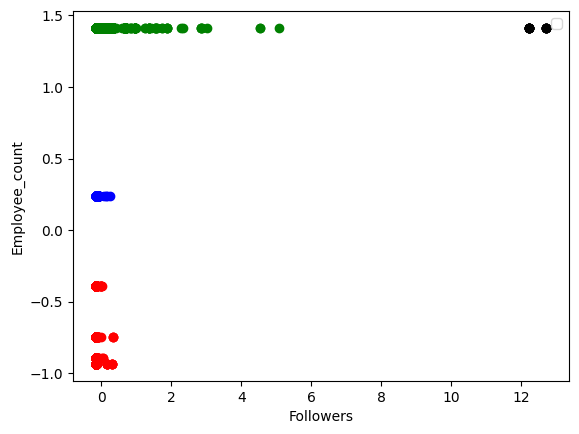

In [263]:
df1 = df[df['Cluster']==0]
df2 = df[df['Cluster']==1]
df3 = df[df['Cluster']==2]
df4 = df[df['Cluster']==3]


plt.scatter(df1.Followers,df1['Employees Count'],color = 'green')
plt.scatter(df2.Followers,df2['Employees Count'],color = 'red')
plt.scatter(df3.Followers,df3['Employees Count'],color = 'black')
plt.scatter(df4.Followers,df4['Employees Count'],color = 'blue')


plt.xlabel('Followers')
plt.ylabel('Employee_count')
plt.legend()

In [124]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Employee_count1','Followers']])
    sse.append(km.inertia_)

C:\Users\Mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

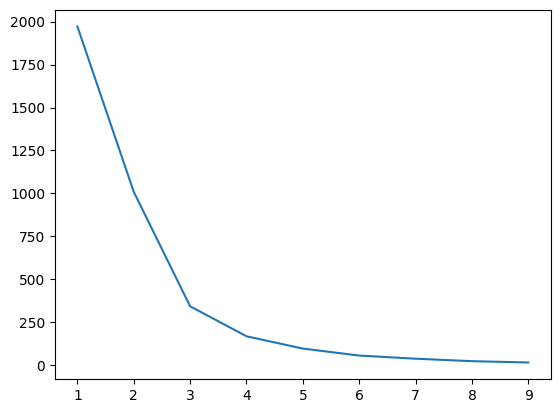

In [127]:
plt.plot(k_rng,sse)

In [126]:
sse

[1971.9999999999998,
 1009.1277007851274,
 342.65498184611954,
 167.99968327917915,
 96.44251921517775,
 55.76068291878903,
 37.50078761808089,
 23.027081306914056,
 15.497877803451708]

In [264]:
df.head(1)

,Company,Designation,Locations,Established Year,Employees Count,Link,HR_Name,Experience,Followers,Skills1,Skills2,Skills3,Skills4,Skills5,Skills6,Skills7,Skills8,Cluster
0,EagleView,Senior Financial Accountant,Work From Home,2008,-0.933908,https://www.instahyre.com/job-248006-senior-fi...,Kavya Iyer,3-6 Years,-0.153708,Accounting,Auditing,Chartered,Accountant,,,,,1


In [265]:

# df['Class'] = kmeans.labels_
df['Cluster'] = df['Cluster'].replace({0: 'Class1', 1: 'Class2', 2: 'Class3', 3: 'Class4'})

# # Save the updated DataFrame to a new CSV file
# df.to_csv('Company_with_class.csv', index=False)

In [267]:
df.to_csv("cluster.csv",index = False)